In [1]:
import matplotlib.pyplot as plt

In [2]:
from pymultifracs.simul import mrw
import numpy as np


In [4]:
H1 = 0.8
H2 = 0.5

lamdba1 = .17
lamdba2 = .17

n_per_class = 100
length = 65536
L = length
X1 =  mrw(shape=(length,n_per_class), H=H1, lam=lamdba1, L=L).T
X2 =  mrw(shape=(length,n_per_class), H=H2, lam=lamdba2, L=L).T

X = np.concatenate([X1,X2],axis = 0)
print(X.shape)
y = np.zeros((2*n_per_class,1))
y[(n_per_class + 1):] = 1

data = np.concatenate([X,y],axis=-1)
np.save('synth_data',data)

(200, 65536)


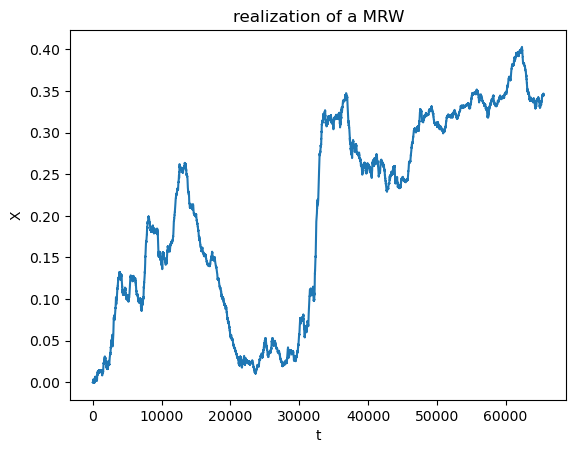

In [24]:

X = mrw(shape=65536, H=0.8, lam=.17, L=65536)

plt.plot(X)
plt.title('realization of a MRW')
plt.ylabel('X')
plt.xlabel('t')
plt.show()

In [7]:
X = mrw(shape=(65536,100), H=0.8, lam=np.sqrt(0.03), L=65536)

In [8]:
X.shape

(65536, 100)

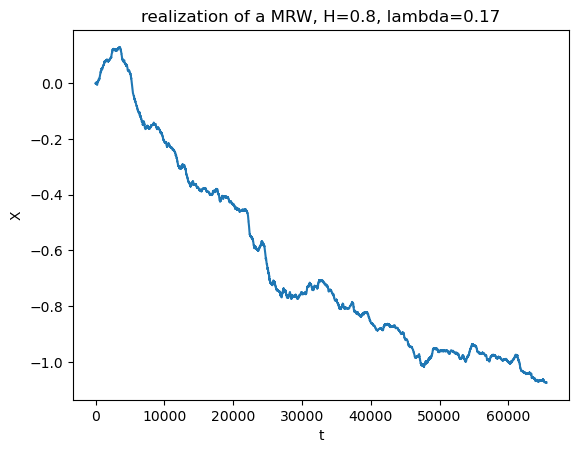

In [13]:
rand_int = np.random.randint(100)
plt.plot(X.T[rand_int])
plt.title('realization of a MRW, H=0.8, lambda=0.17')
plt.ylabel('X')
plt.xlabel('t')
plt.show()